<a href="https://colab.research.google.com/github/nalika/ESOF3675/blob/main/Lab_5_Naive_Bayes_on_Scikit_Learn_and_NN_on_Tensorflow_(Blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Name:** (First_Name) (Last_Name)

**Student ID:** (XXXXXXXXXX)

**Lab No.:** 5

**Colab link:**

# Lab 5 Annoucement

In this lab you will work with

- Scikit-Learn
  - Naive-Bayes Classifier
- Tensorflow with Keras
  - Neural Networks


# Game Prediction

In [ ]:
import pandas as pd

In [ ]:
play_data = {
    'Day': [f'D{i+1}' for i in range(14)],
    'Outlook': [*['Sunny']*2, 'Overcast', *['Rain']*3, 'Overcast', *['Sunny']*2, 'Rain', 'Sunny', *['Overcast']*2, 'Rain'],
    'Humidity': [*['High']*4, *['Normal']*3, 'High', *['Normal']*3, 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', *['Weak']*3, *['Strong']*2, *['Weak']*3, *['Strong']*2, 'Weak', 'Strong'],
    'Play': [*['No']*2, *['Yes']*3, 'No', 'Yes', 'No', *['Yes']*5, 'No']
}

df_play = pd.DataFrame(play_data).set_index('Day')

Considering the `data` below, we want to create a `predictive model` to the `Play` column.

In [ ]:
df_play

,Outlook,Humidity,Wind,Play
Day,,,,
D1,Sunny,High,Weak,No
D2,Sunny,High,Strong,No
D3,Overcast,High,Weak,Yes
D4,Rain,High,Weak,Yes
D5,Rain,Normal,Weak,Yes
D6,Rain,Normal,Strong,No
D7,Overcast,Normal,Strong,Yes
D8,Sunny,High,Weak,No
D9,Sunny,Normal,Weak,Yes


## Tasks

Let's create a model using **Bayes' Theorem** to predict the `Play` column. Thus, we will have three categorical inputs (`Outlook`, `Humidity` and `Wind`).

**Task 1**

Let's calculate the *apropri* probabilities for `Play=Yes` and `Play=No`

In [ ]:
# Tip: Use the values_counts function to calculate the number of occurencies
def count_value(event, value):
  occurences = # Complete Here
  return occurences[value]

def apriori(event='Play', value='Yes'):
  num_values = # Complete Here
  total_events = # Complete Here
  probability = # Complete Here
  return probability

In [ ]:
count_value('Play', 'Yes'), count_value('Play', 'No')

(9, 5)

In [ ]:
apriori(value='Yes'), apriori(value='No')

(0.6428571428571429, 0.35714285714285715)

**Task 2**

Use the `group` by function to count the number of occurrencies for the `Outlook` for each value of `Play`.

In [ ]:
df_outlook = # Complete Here
df_outlook

Humidity  Wind
Outlook  Play                
Overcast Yes          4     4
Rain     No           2     2
         Yes          3     3
Sunny    No           3     3
         Yes          2     2

In [ ]:
df_outlook = df_outlook.unstack(['Play']).fillna(0).stack(['Play'])
df_outlook

Humidity  Wind
Outlook  Play                
Overcast No         0.0   0.0
         Yes        4.0   4.0
Rain     No         2.0   2.0
         Yes        3.0   3.0
Sunny    No         3.0   3.0
         Yes        2.0   2.0

In [ ]:
df_outlook.loc[('Sunny', 'Yes')][0]

2.0

**Task 3**

Compute Probability of `Sunny` given `Yes`.


In [ ]:
prob = # Complete Here
prob

0.2222222222222222

**Task 4**

Apply the soluton of Task 2 and 3 to finish the code for calculating the likelyhood of a given event (e.g. `Outlook`, `Humidity` and `Wind`) given another outcome (`Play`) event.

In [ ]:
def Likelyhood(event, event_value, outcome_event='Play', outcome_value=None):
  occurrencies_event = # Complete Here
  occurrencies_event = occurrencies_event.unstack([outcome_event]).fillna(0).stack([outcome_event])
  count_event = occurrencies_event.loc[(event_value, outcome_value)][0]
  count_outcome = # Complete Here
  likelyhood = count_event/count_outcome
  return likelyhood

In [ ]:
Likelyhood('Outlook', 'Sunny', outcome_value='Yes')

0.2222222222222222

**Task 5**

Calculate the likelyhood of `Yes` given `Sunny`

In [ ]:
Likelyhood('Outlook', 'Sunny', outcome_value='Yes') # Complete Here

0.39999999999999997

**Task 6**

Calculate the likelyhood of `No` given `Sunny`

In [ ]:
# Complete Here

0.6

**Task 7**

Apply your solution to Tasks 5 and 6 to implement the Likelyhood functions below. Each function takes a observed value and an outcome value.

In [ ]:
def L_outcome_given_outlook(outcome, observed):
  return Likelyhood('Outlook', observed, outcome_value=outcome) # Complete Here

def L_outcome_given_humidity(outcome, observed):
  return Likelyhood('Humidity', observed, outcome_value=outcome) # Complete Here

def L_outcome_given_wind(outcome, observed):
  return # Complete Here

In [ ]:
L_outcome_given_outlook('Yes', observed='Sunny'), L_outcome_given_outlook('No', observed='Sunny')

(0.39999999999999997, 0.6)

In [ ]:
L_outcome_given_humidity('Yes', observed='High'), L_outcome_given_humidity('No', observed='High')

(0.4285714285714286, 0.5714285714285715)

In [ ]:
L_outcome_given_wind('Yes', observed='Weak'), L_outcome_given_wind('No', observed='Weak')

(0.7500000000000001, 0.25000000000000006)

**Task 8**

Implement the function below. It will calculate the likelihood of an outcome given all the events of a Day.

In [ ]:
def L_outcome_given_day(outcome, outlook, humidity, wind):
  return # Complete Here

Suppose we have a Day with the values below, predict what is the most likely outcome.

- Outlook =  Rain
- Humidity =  High
- Wind = Weak
- Play =?


In [ ]:
L_outcome_given_day('Yes', 'Rain', 'High', 'Weak')

0.04761904761904762

In [ ]:
L_outcome_given_day('No', 'Rain', 'High', 'Weak')

0.04571428571428573

In [ ]:
df_play.iloc[3:4]

,Outlook,Humidity,Wind,Play
Day,,,,
D4,Rain,High,Weak,Yes


**Task 9**

Use Scikit Learn to fit the provided data

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [ ]:
pipe_nb = make_pipeline(
  OrdinalEncoder(),
  # Complete Here
)

In [ ]:
# Fit the data Here

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('categoricalnb',
                 CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
df_play.head()

,Outlook,Humidity,Wind,Play
Day,,,,
D1,Sunny,High,Weak,No
D2,Sunny,High,Strong,No
D3,Overcast,High,Weak,Yes
D4,Rain,High,Weak,Yes
D5,Rain,Normal,Weak,Yes


In [ ]:
pipe_nb.predict([['Rain', 'High', 'Weak']])

array(['Yes'], dtype='<U3')

---

# Tensorflow with Keras

In this section we will introduce how to create models using tensorflow with Keras.

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Flatten, MaxPool2D, Conv2D, Dense, Reshape, Dropout
from keras.utils import np_utils

## MNIST Dataset

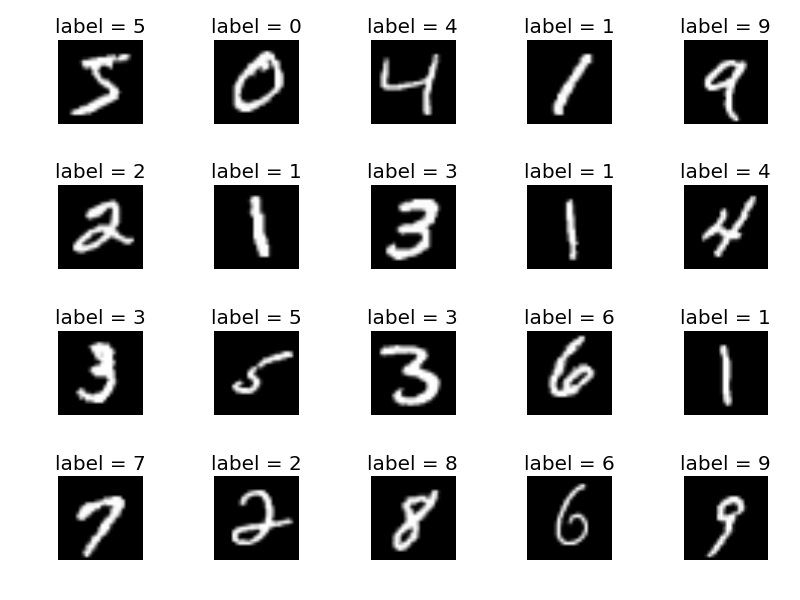

In [ ]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## Creating Models

**Task 10**

Let's create the simplest model we can have. The plain `softmax` layer, i.e an `Dense` layer with the `softmax` activation function. The last layer should contains a neuron per each output class.

In [ ]:
model_softmax = Sequential([
  Input(shape=(28, 28, 1)),
  Flatten(),
  # Add the softmax layer in here
  # Complete Here
])

**Task 11**

Compile the model, use the `compile` function. Define the `categorical_crossentropy` as loss, `adam` as optimizer and `accuracy` as metrics.

In [ ]:
# Complete Here

Summarizing the model layers, their shape an trainable parameters.

In [ ]:
model_softmax.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Training model

In [ ]:
model_softmax.fit(X_train, Y_train, batch_size = 32, epochs = 10, validation_data=(X_test, Y_test), validation_freq=2, verbose = 1);

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7039 - accuracy: 0.8163
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.9170 - val_loss: 0.2803 - val_accuracy: 0.9217
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2887 - accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2758 - accuracy: 0.9241 - val_loss: 0.2680 - val_accuracy: 0.9256
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2633 - accuracy: 0.9275
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2475 - accuracy: 0.9317 - val_loss: 0.2719 - val_accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2575 - accuracy: 0.9290
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2568 - accuracy: 0.9285 - val_loss: 0.2639 - val_accuracy: 0.9277
Epoch 9/10
1875/

## Neural Network

**Task 12**

Let's build a new model. This time a little more elaborate.

- Add two hidden layers to the model with `16` and `64` neurons units, respectively. Use the `relu` activation function with those layers.

In [ ]:
model_simple_nn = Sequential([
  Input(shape=(28, 28, 1)),
  Flatten(),
  # Complete Here
])

In [ ]:
# Compile the Model Here

**Task 13**

Give us your insights

- Why after adding two extra layers, with way more neurons than we had previously, we only increase the number of parameter by 2.

In [ ]:
model_simple_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,298
Trainable params: 14,298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_simple_nn.fit(X_train, Y_train, batch_size = 32, epochs = 10, validation_data=(X_test, Y_test), validation_freq=2, verbose = 1);

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6756 - accuracy: 0.7896
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2301 - accuracy: 0.9317 - val_loss: 0.2041 - val_accuracy: 0.9394
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1806 - accuracy: 0.9462
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1469 - accuracy: 0.9551 - val_loss: 0.1585 - val_accuracy: 0.9516
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1348 - accuracy: 0.9589
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1189 - accuracy: 0.9636 - val_loss: 0.1452 - val_accuracy: 0.9568
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1107 - accuracy: 0.9651
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1014 - accuracy: 0.9681 - val_loss: 0.1516 - val_accuracy: 0.9549
Epoch 9/10
1875/

**Task 14**

Add a convolution layer to the neural network. Put this layer between the input and the flatten layers. Use 4 filters, and a kernel of size `(5, 5)` combined with the `relu` activation function.

In [ ]:
model_1_layer_cnn = Sequential([
  Input(shape=(28, 28, 1)),
  # Complete Here
  Flatten(),
  # Complete Here
])

In [ ]:
# Compile the Model Here

**Task 15**

Give you opinion on the new number of parameters of the model. Try to explain the increasement in this number.

In [ ]:
model_1_layer_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                36880     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 38,722
Trainable params: 38,722
Non-trainable params: 0
_________________________________________________________________


Train the model for 2 epochs. Notice how long it takes.

In [ ]:
model_1_layer_cnn.fit(X_train, Y_train, batch_size = 32, epochs = 2, validation_data=(X_test, Y_test), validation_freq=2, verbose = 1);

Epoch 1/2
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5460 - accuracy: 0.8346
Epoch 2/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1228 - accuracy: 0.9624 - val_loss: 0.0868 - val_accuracy: 0.9717


**Task 16**

Replicate the convolutional layer, adding two more.

In [ ]:
model_3_layer_cnn = Sequential([
  Input(shape=(28, 28, 1)),
  # Complete Here
  Flatten(),
  # Complete Here
])

In [ ]:
# Compile the Model Here

**Task 17**

Give you opinion on the new number of parameters of the model. Try to explain the drastic reduction in this number.

In [ ]:
model_3_layer_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 4)         404       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 4)         404       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                16400     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

**Task 18**

Train the model for 1 epochs. Notice how long it takes. Try to explain why it is taking a considerable different amout of time to run.

In [ ]:
model_3_layer_cnn.fit(X_train, Y_train, batch_size = 32, epochs = 1, validation_data=(X_test, Y_test), validation_freq=2, verbose = 1);

1140/1875 [=================>............] - ETA: 19s - loss: 0.1202 - accuracy: 0.9636